In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data and sort chronologically

work = pd.read_csv("../augmento_BTC_24h.csv")
work = work.sort_values(by="Date", ascending=True)
work = work.reset_index()

sizePar = 10

In [3]:
work.head()

,index,Date,BTC_Price,BTC_Volume,Hacks,Pessimistic/Doubtful,Banks,Selling,Market_manipulation,(De-)centralisation,...,Buying,Warning,Annoyed/Frustrated,Price,Use_case/Applications,Rumor,Scam/Fraud,Airdrop,Optimistic,Negative
0,1063,2016-11-01,729.79,130527000,13,61,98,62,15,67,...,129,16,2,710,276,7,71,2,231,784
1,1062,2016-11-02,740.83,84865200,28,68,98,57,15,70,...,103,15,3,589,275,4,54,0,271,827
2,1061,2016-11-03,688.70,172808000,26,62,110,68,17,56,...,150,11,1,765,240,10,44,0,227,815
3,1060,2016-11-04,703.23,99907696,42,43,85,68,32,58,...,114,14,3,615,200,30,75,1,166,743
4,1059,2016-11-05,703.42,53752300,17,48,75,56,19,57,...,89,6,2,524,195,10,54,0,175,629


count    1063.000000
mean        0.001354
std         0.043280
min        -0.230634
25%        -0.015055
50%         0.003119
75%         0.021565
max         0.201579
Name: BTC_Price_diff, dtype: float64

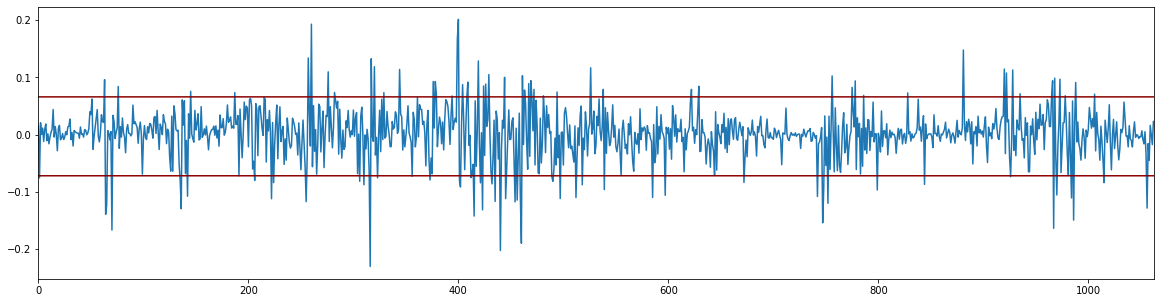

In [4]:
work["BTC_Price+1"] = work["BTC_Price"].shift(-1)
work["BTC_Price_diff"] = (work["BTC_Price+1"] - work["BTC_Price"]) / work["BTC_Price+1"]
work["BTC_Price_diff_95"] = work["BTC_Price_diff"].quantile(.95)
work["BTC_Price_diff_05"] = work["BTC_Price_diff"].quantile(.05)


fig1 = plt.figure(figsize = (sizePar*2, sizePar/2))

ax = work.BTC_Price_diff.plot(figsize=(sizePar*2, sizePar/2))#, style=".")
#ax = work.plot(y="BTC_Price_diff", x="Date", label="Relative difference in BTC Price", figsize=(sizePar*2, sizePar/2))
ax = work.BTC_Price_diff_05.plot(figsize=(sizePar*2, sizePar/2), ax=ax, color="DarkRed")
ax = work.BTC_Price_diff_95.plot(figsize=(sizePar*2, sizePar/2), ax=ax, color="DarkRed")
ax

plt.savefig('relpricediff.png', dpi=300, transparent=True)

work.BTC_Price_diff.describe()#quantile(.25)

In [5]:
work_High = work[work.BTC_Price_diff > work["BTC_Price_diff"].quantile(.95)]
work_Low = work[work.BTC_Price_diff < work["BTC_Price_diff"].quantile(.05)]

print(round(len(work_High) * 2 * 100 / len(work), 2), "% of all days considered outliers")

10.15 % of all days considered outliers


In [6]:
def Comparison(outl, data):
    #x = (outl.mean() - data.mean()) / data.mean()
    x = outl.mean() / data.mean()
    x = x.sort_values(ascending=False)
    print("> 5 highest values:")
    print(round(x[:5], 4), "\n")
    print("> 5 lowest values:")
    print(round(x[-5:], 4), "\n")
    print("Mean is", x.mean().round(4))
    #return(x)

In [7]:
Comparison(work_Low.iloc[:, 4:97], work.iloc[:, 4:97])

> 5 highest values:
Flippening    2.0610
Correction    1.8270
Bubble        1.7354
Fees          1.6396
Hodling       1.5776
dtype: float64 

> 5 lowest values:
Volume        1.1431
Bottom        1.1044
Governance    1.0622
Stablecoin    0.8287
ETF           0.7098
dtype: float64 

Mean is 1.3511


In [8]:
Comparison(work_High.iloc[:, 4:97], work.iloc[:, 4:97])

> 5 highest values:
Correction       1.8614
Pump_and_dump    1.8206
Dip              1.6984
Flippening       1.6869
FOMO_theme       1.6559
dtype: float64 

> 5 lowest values:
Bug           1.1489
Leverage      1.1428
Governance    1.1020
Stablecoin    0.9508
ETF           0.6167
dtype: float64 

Mean is 1.3585
